##**★ 다음과 같이 작성해보세요.**
- 다음과 같이 검색하여 파일을 생성합니다. 파일이름은 임의로 설정합니다.
 - 기상자료개발포털 : http://data.kma.go.kr --> '기후통계분석' --> '통계분석' --> '조건별 통계'
 - 지역/지점 : *조별 지정된 지역 선택*
 - 기간 : 일, 2010 ~ 2023
 - 월 : 1 ~ 12, 일 : 1 ~ 31

###**1. 데이터 불러오기**

In [260]:
import numpy as np
import pandas as pd

In [261]:
seoul_weather = pd.read_csv('../data/2010-2023_seoul_weather.csv', encoding='EUC-KR')
seoul_weather

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,\t\t108,서울,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1
1,\t\t108,서울,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6
2,\t\t108,서울,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3
3,\t\t108,서울,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6
4,\t\t108,서울,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3
...,...,...,...,...,...,...,...,...,...
5116,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5117,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5118,\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5119,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**2. 데이터 셋 재조정**
 - 지점번호, 지점명을 제외한 데이터만 가져오기<br>
   - 변수명 = 변수명.loc[행레이블,열레이블]
 - 열이름 변경
    - 변수명.columns=['열이름', '열이름', ....]

In [262]:
# 지점번호, 지점명을 제외한 데이터만 data 변수로 저장
# 데이터프레임 변수 data의 열번호 변경 ==> '일시','평균기온','최고기온','최고기온시각','최저기온','최저기온시각','일교차'
# data = seoul_weather.drop(['지점번호','지점명'], axis=1)
# data

data = seoul_weather.loc[:, '일시':]
data.columns = ['일시','평균기온','최고기온','최고기온시각','최저기온','최저기온시각','일교차']
data.head()

,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차
0,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1
1,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6
2,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3
3,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6
4,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3


###**3. 결측값 확인**
- 결측값 개수 확인 : 변수명.isnull().sum()
- 결측값 데이터 확인 : 변수명[변수명['컬럼명'].isnull( )]

In [263]:
# 결측값 개수 확인
data.isnull().sum()

일시         8
평균기온       8
최고기온       9
최고기온시각     9
최저기온       9
최저기온시각     9
일교차       10
dtype: int64

In [264]:
# 결측값 데이터 확인
data[data['일시'].isnull()]

,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차
5113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5120,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**4. 결측값 행/열 삭제**
- 결측값이 들어있는 행 전체 삭제하기 : 변수명.dropna(axis=0)
- 결측값이 들어있는 열 전체 삭제하기 : 변수명.dropna(axis=1)


In [265]:
# 결측값 행 전체 삭제
print('삭제 전',data.shape) # 삭제 전 shape 조회
data = data.dropna(axis=0)
print('삭제 후', data.shape) # 삭제 후 shape 조회
data.isnull().sum()

삭제 전 (5121, 7)
삭제 후 (5111, 7)


일시        0
평균기온      0
최고기온      0
최고기온시각    0
최저기온      0
최저기온시각    0
일교차       0
dtype: int64

In [266]:
# 기본 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5111 non-null   object 
 1   평균기온    5111 non-null   float64
 2   최고기온    5111 non-null   float64
 3   최고기온시각  5111 non-null   object 
 4   최저기온    5111 non-null   float64
 5   최저기온시각  5111 non-null   object 
 6   일교차     5111 non-null   float64
dtypes: float64(4), object(3)
memory usage: 319.4+ KB


###**5-1. 최고기온과 해당 날짜 출력**
- ⓐ 최고기온 계산 : '최고기온' 컬럼에서 최대값 계산(max() 함수)
 - hint : 변수명['컬럼명'].max( )
- '최고기온' 컬럼에서 'ⓐ 계산된 최고기온'과 같은 데이터 검색
 - hint : 변수명[변수명['컬럼명'] == 비교값] [ ['컬럼명1', '컬럼명2', ....] ]
- index 재조정 : 변수명.reset_index( )
- '날짜', '최고온도' 컬럼 출력 : 변수명.loc[행레이블,열레이블]

```
[출력결과]
00 지역에서 최고 기온이 가장 높았던 날은 0000-00-00 로 00.0도 였습니다.
```



In [267]:
# '최고기온' 컬럼에서 '계산된 최고기온'과 같은 데이터 검색하여 maxData 변수에 저장
# maxData 데이터프레임의 index 초기화
# maxData 데이터프레임에서 '일시'와 '최고기온' 출력 - 변수명.loc[0,열이름]
max_temp = data['최고기온'].max()
print('최고기온', max_temp)
maxData = data.loc[data['최고기온'] == max_temp,['일시', '최고기온']].reset_index(drop=True)

print('서울 지역에서 최고 기온이 가장 높았던 날은 ', maxData.iloc[0,0], '로 ', maxData.iloc[0,1], '도 였습니다.', sep='')

최고기온 39.6
서울 지역에서 최고 기온이 가장 높았던 날은 2018-08-01로 39.6도 였습니다.


###**5-2. 최저기온와 해당 날짜 출력**
- ⓑ 최저기온 계산 : '최저기온' 컬럼에서 최소값 계산(min() 함수)
- '최저기온' 컬럼에서 'ⓑ 계산된 최저기온'과 같은 데이터 검색
- index 재조정 : 변수명.reset_index( )
- '날짜', '최저온도' 컬럼 출력 : 변수명.loc[행레이블,열레이블]

```
[출력결과]
00 지역에서 최저 기온이 가장 낮았던 날은 0000-00-00 로 00.0도 였습니다.
```

In [268]:
# '최저기온' 컬럼에서 '계산된 최저기온'과 같은 데이터 검색하여 minData 변수에 저장
# minData 데이터프레임의 index 초기화
# minData 데이터프레임에서 '일시'와 '최저기온' 출력 - 변수명.loc[0,열이름]
min_temp = data['최저기온'].min()
print('최저기온', min_temp)
minData = data.loc[data['최저기온'] == min_temp,['일시', '최저기온']].reset_index(drop=True)

print('서울 지역에서 최저 기온이 가장 낮았던 날은 ', minData.iloc[0,0], '로 ', minData.iloc[0,1], '도 였습니다.', sep='')

최저기온 -18.6
서울 지역에서 최저 기온이 가장 낮았던 날은 2021-01-08로 -18.6도 였습니다.


###**7. 본인 생일 날짜의 기온 변화 그래프 작성**
- **1단계 : '일시' 열에서 '년'만, '월-일'만 추출하여 새로운 열 생성**
 - 인덱싱 : 변수명['컬럼명'].str[ ]
 - '년도' 열 생성 : '일시' 컬럼의 값에서 앞 4자리까지만 추출 ==> data['년도'] = data['일시'].str[ :4 ]
 - '날짜' 열 생성 : '일시' 컬럼의 값에서 5자리부터 끝까지만 추출 ==> data['날짜'] = data['일시'].str[ 5: ]

- **2단계 : 생성된 '날짜'열 값에서 본인 생일과 동일한 날짜 검색**
- **3단계 :'년도(2010 ~ 2023)'별로 '최고기온'과 '최저기온' 변화 꺽은선 그래프 작성**
  - 차트 크기 : plt.figure(figsize=(가로, 세로)), 단위:inch
  - 차트 제목 : plt.title("제목")
  - 차트 범례 : plt.legend( )
  - 차트 보여주기 : plt.show( )

In [269]:
# 한글 폰트 설치
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [270]:
# 일시 데이터 자세히 보기
print(data.일시[0])
type(data.일시[0])

2010-01-01


str

In [271]:
# 1단계 : '일시' 열에서 새로운 열 '년도'과 '날짜'열 생성
data['년도'] = data['일시'].str[:4]
data['날짜'] = data['일시'].str[5:]
data

,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차,년도,날짜
0,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1,2010,01-01
1,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6,2010,01-02
2,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3,2010,01-03
3,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6,2010,01-04
4,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3,2010,01-05
...,...,...,...,...,...,...,...,...,...
5108,2023-12-27,1.5,6.8,15:49,-2.8,8:13,9.6,2023,12-27
5109,2023-12-28,1.2,4.4,14:53,-1.7,6:20,6.1,2023,12-28
5110,2023-12-29,1.3,4.6,14:38,-1.5,7:25,6.1,2023,12-29
5111,2023-12-30,0.6,2.1,23:54,-0.9,2:37,3.0,2023,12-30


In [272]:
# 년도 데이터 str -> int32 변환(메모리 공간 절약을 위해 int32 사용)
print('변경 전', type(data.년도[0]))
data['년도'] = data['년도'].astype('int32')
print('변경 후', type(data.년도[0]))

변경 전 <class 'str'>
변경 후 <class 'numpy.int32'>


In [273]:
# 년도별로 평균기온의 평균 계산
data.groupby('년도')['평균기온'].mean()

년도
2010    12.140822
2011    12.082192
2012    12.268579
2013    12.563562
2014    13.400274
2015    13.621918
2016    13.592896
2017    13.077747
2018    13.002466
2019    13.598904
2020    13.271858
2021    13.752055
2022    13.259066
2023    14.109041
Name: 평균기온, dtype: float64

In [274]:
# 2단계 : 생성된 '날짜'열 값에서 본인 생일과 동일한 날짜 검색하여 birthData 변수에 저장
# 예: data[data['날짜']=='10-01']
birthData = data[data['날짜'] == '08-03']
birthData

,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차,년도,날짜
214,2010-08-03,27.6,32.1,16:03,24.0,5:57,8.1,2010,08-03
579,2011-08-03,25.4,28.1,10:26,23.7,5:57,4.4,2011,08-03
945,2012-08-03,31.3,35.4,16:10,27.1,5:25,8.3,2012,08-03
1310,2013-08-03,28.9,32.6,16:02,26.7,5:41,5.9,2013,08-03
1675,2014-08-03,26.5,30.5,12:09,24.1,5:32,6.4,2014,08-03
2040,2015-08-03,27.9,31.5,15:10,25.6,5:50,5.9,2015,08-03
2406,2016-08-03,29.1,34.2,16:15,24.0,5:42,10.2,2016,08-03
2771,2017-08-03,30.2,33.9,15:18,27.2,6:10,6.7,2017,08-03
3136,2018-08-03,33.1,37.9,14:15,30.0,23:42,7.9,2018,08-03
3501,2019-08-03,29.4,36.0,14:11,25.6,5:36,10.4,2019,08-03


In [275]:
# 내 생일날 중에서 최고기온, 최저기온의 연도는?
max_temp_birthday = birthData.loc[birthData['최고기온'] == birthData['최고기온'].max(), ['년도','최고기온']].reset_index(drop=True)
print(max_temp_birthday)
min_temp_birthday = birthData.loc[birthData['최저기온'] == birthData['최저기온'].max(), ['년도','최저기온']].reset_index(drop=True)
print(min_temp_birthday)

     년도  최고기온
0  2018  37.9
     년도  최저기온
0  2018  30.0


In [276]:
%pip install matplotlib # matplotlib 설치

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


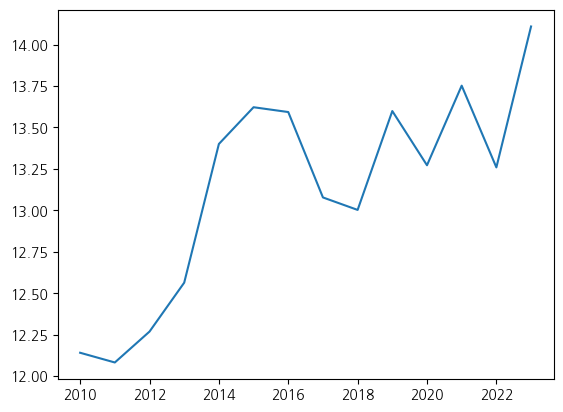

In [277]:
# 연도별 평균기온 그래프 그리기
import matplotlib.pyplot as plt
meanData = data.groupby('년도')['평균기온'].mean()
plt.plot(meanData)
plt.show()

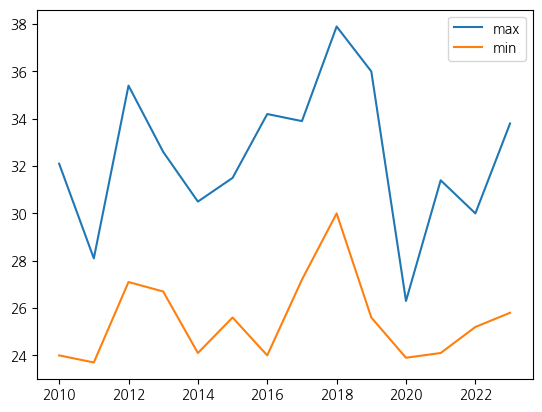

In [278]:
# 3단계 :'년도(2010 ~ 2023)'별로 '최고기온'과 '최저기온' 꺽은선 그래프 작성, birthData 변수 이용
# 차트 사이즈 : 가로 - 12 inch, 세로 - 10 inch

plt.plot(birthData['년도'], birthData['최고기온'], label ='max')
plt.plot(birthData['년도'], birthData['최저기온'], label ='min')
plt.legend() # 범례 표시
plt.show()